<a href="https://colab.research.google.com/github/RiseAboveAll/PYTORCH_Learning/blob/master/CNN_Pytorch_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Theory

**Modules Required**:

- Convolutional Module :

Main part is filter or kernel which is a 4 dimensional kernel of size C1xHxWxC2

Size of kernel is always odd

    ```

    nn.Conv2d(in_channels=C1,out_channels=C2,kernel_size=K,stride=s)

    ```

Why do we use Conv2d?

We know that color images are 3-d images os shape HxWxC. But the channel dimension(C) is not a spatial dimension, hence it is a 2-D, i.e signal does not flow in that direction. 

We can have 1-d Convolution and 3-d convolutions also. When we have some input which varies with time (time series data) we use 1-d convolution. Whereas if we look at video, it will be a 3-d convolution. It is because Height , Width are the spatial dimensions & Time is the third dimension. It is also possble to have object with 3 dimensions of shape HxWxD.

**Important Concepts :**

- Inheritance :

Pytorch models are all based on **Module**, Module is a base class that all other modules inherit from. (nn.Module). eg: nn.Linear() model inherits from the nn.Module class.

Inheritance means there exists a relationship. 

-  Hierachical Structure :

Due to Module the models are in hirearchical structure. Stacking of layers also brings hierachy. Stacking can be in form of i.e model is module of module of module, i.e Model is also a module. 

-  Custom Models :

We build custom model because sometimes we need operation which is not a module. It is also known as Functional Model .

  - Comparison of Sequential and Custom Model:

  ***Sequential Model**

  ```

  Model=nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10)
  )

  ```
  ***Functional Model**

  ```
  Class ANN(nn.Module):

    def __init__(self):
      super(ANN,self).__init__()
      #Layer Definiton
      self.layer1=nn.Linear(784,128)
      self.layer2=nn.ReLU()
      self.layer3=nn.Linear(128,10)
    def forward(self,x):
      #Layer Execution
      x=self.layer1(x)
      x=self.layer2(x)
      x=self.layer3(x)
      return x
  model=ANN()

  ```




**CNN Custom Sequential Model**


``` 

class CNN(nn.Module):

  def __init__(self,K):

    suoer(CNN,self).__init__()
    #Define the Convolution Layers
    self.conv=nn.Sequential(
                #The number of filters specified in the out_channels parameter will be the number of filters for the in_channels parameter of the next layer 
                nn.Conv2d(3,32,kernel_size=3,stride=2)
                nn.Conv2d(32,64,kernel_size=3,stride=2)
                nn.Conv2d(64,128,kernel_size=3,stride=2))
    #Define the Dense Layer
    self.dense=nn.Sequential(
                nn.Linear(?,1024)
                nn.Linear(1024,k)
    )
  def forward(self,X):
    out=self.conv(X)
    out=out.view(-1,?)
    out=self.dense(out)
    return out

```

*Note :In the above code :

? depicts the product of final image dimension , i.e the product of last convolution layer feature map. 

Sometimes we use **Dropout** in convolution network also. It is used for regularization. To implemet Dropout use : nn.Dropout(p_drop)





To know how calculate the dimensionality of the initial feature vector into the dense layers of CNN we need to understand Convolutional Arithmatic.

Convolution Layer Shape Convention : 

-  Input : (N,Cin,Hin,Win)

-  Output : (N,Cout,Hout,Wout)

<h2>Convolutional Arithmatic</h2>

- It is used for calculating the output size. 

- Formula : O=[[Hin - K + (2*P)]/s]+1

 



## Code

### Import Libraries

In [8]:
!pip3 install --upgrade numpy

     |████████████████████████████████| 14.5MB 234kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5


In [14]:
import torch
from torch import nn
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader

import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime

### Load Dataset

In [2]:
train_dataset=torchvision.datasets.FashionMNIST(root='.',train=True,transform=transforms.ToTensor(),download=True)

In [3]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [4]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [5]:
test_dataset=torchvision.datasets.FashionMNIST(root='.',train=False,transform=transforms.ToTensor(),download=True)

In [6]:
#Number of classes
K=len(set(train_dataset.targets.numpy()))

In [7]:
print('Number of Classes {0}'.format(K))

Number of Classes 10


### Building Model

In [10]:
class CNN(nn.Module):
  def __init__(self,K):
    super(CNN,self).__init__()
    self.conv_layers=nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,stride=2),
        nn.ReLU(),
        nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=2),
        nn.ReLU(),
        nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=2),
        nn.ReLU()
    )
    self.dense_layer=nn.Sequential(
        nn.Dropout(.2),
        nn.Linear(128*2*2,512),
        nn.ReLU(),
        nn.Dropout(.2),
        nn.Linear(512,K)
    )
  def forward(self,X):
    out=self.conv_layers(X)
    out=out.view(out.size(0),-1)
    out=self.dense_layer(out)
    return out

In [71]:
#Instantiate Model
model=CNN(K)


In [72]:
#Move model to GPU
device=torch.device('cuda:0' if torch.cuda.is_available() else  "cpu")
model.to(device)

CNN(
  (conv_layers): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2))
    (5): ReLU()
  )
  (dense_layer): Sequential(
    (0): Dropout(p=0.2, inplace=False)
    (1): Linear(in_features=512, out_features=512, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)

In [73]:
#Loss and Optimizer
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=.00005)

In [74]:
#Data Loader
#It is useful because it automatically generates batches in training loop.
batch_size=128
train_loader=DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [75]:
# Function to Encapsulate training
def batch_gradient(model,criterion,optimizer,train_loader,test_loader,epochs):
  train_losses=np.zeros(epochs)
  test_losses=np.zeros(epochs)
  for it in range(epochs):
    t0=datetime.now()
    train_loss=[]
    for inputs,targets in train_loader:
      #Move Data to GPU
      inputs,targets=inputs.to(device),targets.to(device)
      #Zero the parameter Gradient
      optimizer.zero_grad()
      #Forward Pass
      outputs=model(inputs)
      loss=criterion(outputs,targets)
      #Bacward Pass
      loss.backward()
      #Perform single optmization step
      optimizer.step()

      train_loss.append(loss.item())

    #Get train loss and test loss
    train_loss=np.mean(train_loss)
    test_loss=[]
    for inputs,targets in test_loader:
      #Move Data to GPU
      inputs,targets=inputs.to(device),targets.to(device)
      outputs=model(inputs)
      loss=criterion(outputs,targets)
      test_loss.append(loss.item())
    test_loss=np.mean(test_loss)

    #Save Losses
    train_losses[it]=train_loss
    test_losses[it]=test_loss
    dt=datetime.now()-t0
    print(f'Epoch {it+1}/{epochs},Duration : {dt} , Train Loss : {train_loss : .4f},  Test Loss : {test_loss : .4f}')
  return train_losses,test_losses






In [76]:
train_losses,test_losses=batch_gradient(model,criterion,optimizer,train_loader,test_loader,25)

Epoch 1/25,Duration : 0:00:06.590903 , Train Loss :  1.2683,  Test Loss :  0.8116
Epoch 2/25,Duration : 0:00:06.598372 , Train Loss :  0.7386,  Test Loss :  0.7043
Epoch 3/25,Duration : 0:00:06.581935 , Train Loss :  0.6571,  Test Loss :  0.6490
Epoch 4/25,Duration : 0:00:06.622883 , Train Loss :  0.6091,  Test Loss :  0.6159
Epoch 5/25,Duration : 0:00:06.584243 , Train Loss :  0.5727,  Test Loss :  0.5823
Epoch 6/25,Duration : 0:00:06.552313 , Train Loss :  0.5489,  Test Loss :  0.5636
Epoch 7/25,Duration : 0:00:06.575441 , Train Loss :  0.5277,  Test Loss :  0.5427
Epoch 8/25,Duration : 0:00:06.571662 , Train Loss :  0.5119,  Test Loss :  0.5253
Epoch 9/25,Duration : 0:00:06.585017 , Train Loss :  0.4967,  Test Loss :  0.5182
Epoch 10/25,Duration : 0:00:06.627233 , Train Loss :  0.4847,  Test Loss :  0.5068
Epoch 11/25,Duration : 0:00:06.629848 , Train Loss :  0.4737,  Test Loss :  0.4913
Epoch 12/25,Duration : 0:00:06.602020 , Train Loss :  0.4642,  Test Loss :  0.4879
Epoch 13/25,D

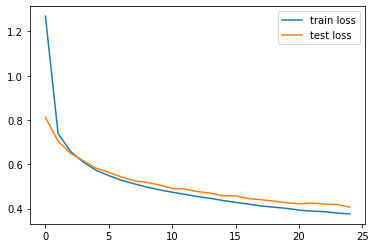

In [77]:
plt.plot(train_losses,label='train loss')
plt.plot(test_losses,label='test loss')
plt.legend()

In [78]:
# Accuracy

n_correct=0
n_total=0
for inputs,targets in train_loader:
  #Move data to GPU
  inputs,targets=inputs.to(device),targets.to(device)
  #Forward Pass
  outputs=model(inputs)
  #Get Prediction
  _,predictions=torch.max(outputs,1)
  #update counts
  n_correct += (predictions==targets).sum().item()
  n_total += targets.shape[0]
train_acc = n_correct/n_total
n_correct=0
n_total=0
for inputs,targets in test_loader:
  #Move data to GPU
  inputs,targets=inputs.to(device),targets.to(device)
  #Forward Pass
  outputs=model(inputs)
  #Get Prediction
  _,predictions=torch.max(outputs,1)
  #update counts
  n_correct += (predictions==targets).sum().item()
  n_total += targets.shape[0]
test_acc=n_correct/n_total
print(f'Train Acc : {train_acc:.4f}, Test Acc : {test_acc:.4f}')

Train Acc : 0.8626, Test Acc : 0.8481
